**20250727 Economics Analysis - Large Bank Credit Card and Mortage Time series**

The FRED recently has new releases (67 series) related to Large Bank's credit card and mortgage data. Let's take a look at some of them.  

https://news.research.stlouisfed.org/2025/07/fred-adds-large-bank-credit-card-and-mortgage-data/

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
from pandas_datareader import data as pdr

In [2]:
# Input FRED API key here
# fred_key ="Your FRED API Key here"
#fred_key =""
fred = Fred(fred_key)

**A quick look at current credit card balance and overdue payment**

1) Total Balance 

   Large Bank Consumer Credit Card Balances: Total Balances (RCCCBBALTOT) in USD Billions

2) Past Due Balances

    Large Bank Consumer Credit Card Balances: 30 or More Days Past Due Rates: Accounts Based (RCCCBACTDPD30P) in percent

    Large Bank Consumer Credit Card Balances: 90 or More Days Past Due Rates: Accounts Based (RCCCBACTDPD90P) in percent

In [3]:
#President Trump first term started on Jan 20, 2017.  
#To show the change in the indices during his first term, COVID and second term so far
#Let's start from beginning of 2017
start_date = "2017-01-01"
#end_date = '2023-12-31'

In [4]:
cc_id = ["RCCCBBALTOT",
                 'RCCCBACTDPD30P', 'RCCCBACTDPD90P'
                 ]
df_cc = pdr.DataReader(cc_id, 'fred', start=start_date) #end=end_date)
df_cc.dropna()

,RCCCBBALTOT,RCCCBACTDPD30P,RCCCBACTDPD90P
DATE,,,
2017-01-01,646.20,1.38,0.64
2017-04-01,665.25,1.37,0.57
2017-07-01,680.10,1.52,0.67
2017-10-01,720.28,1.57,0.72
2018-01-01,678.86,1.37,0.65
2018-04-01,696.86,1.31,0.57
2018-07-01,708.41,1.47,0.65
2018-10-01,739.02,1.65,0.79
2019-01-01,704.43,1.40,0.68


In [5]:
df_cc_account_overdue = df_cc.iloc[:,1:]
df_cc_account_overdue

,RCCCBACTDPD30P,RCCCBACTDPD90P
DATE,,
2017-01-01,1.38,0.64
2017-04-01,1.37,0.57
2017-07-01,1.52,0.67
2017-10-01,1.57,0.72
2018-01-01,1.37,0.65
2018-04-01,1.31,0.57
2018-07-01,1.47,0.65
2018-10-01,1.65,0.79
2019-01-01,1.40,0.68


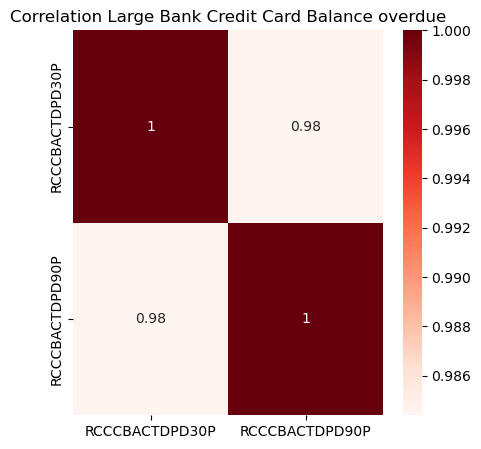

In [6]:
plt.figure(figsize = (5,5))
ax = plt.axes()
sns.heatmap(df_cc_account_overdue.corr(), cmap="Reds", annot=True, ax = ax)
ax.set_title('Correlation Large Bank Credit Card Balance overdue')
plt.show()

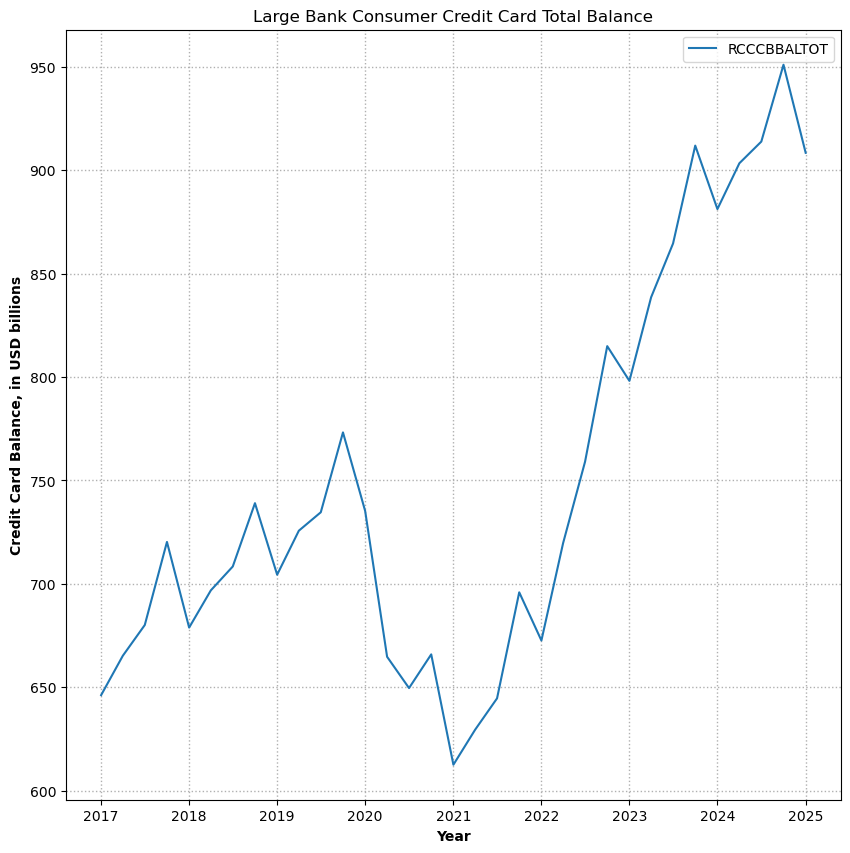

In [7]:
plt.figure(figsize = (10,10))
plt.plot(df_cc.index, df_cc.iloc[:,0].values, 
             label=df_cc.iloc[:,0].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Credit Card Balance, in USD billions", fontweight = 'bold')
plt.title("Large Bank Consumer Credit Card Total Balance")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


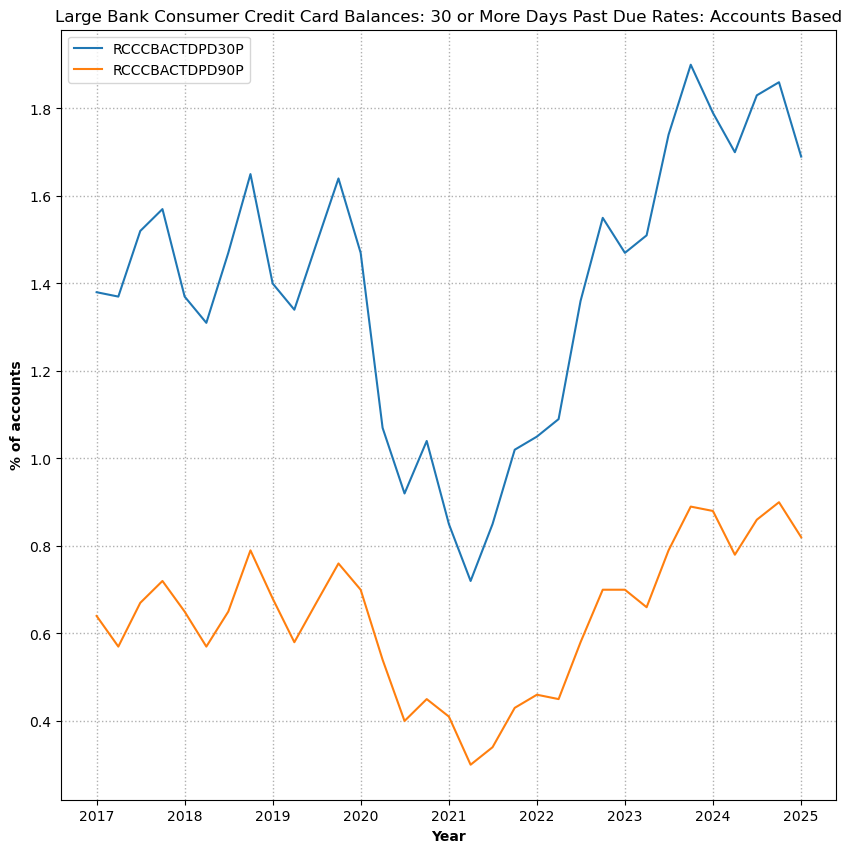

In [8]:
plt.figure(figsize = (10,10))
for i in range(len(df_cc_account_overdue.columns)):
    plt.plot(df_cc_account_overdue.index, df_cc_account_overdue.iloc[:,i].values, 
             label=df_cc_account_overdue.iloc[:,i].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("% of accounts", fontweight = 'bold')
plt.title("Large Bank Consumer Credit Card Balances: 30 or More Days Past Due Rates: Accounts Based")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


Starting from 2024, Consumer Credit Card total balances and payment over due relative to total have been decreasing.  This may be a sign of improvement in US household finance.

**A quick look at current mortgage balance and overdue & foreclosure balance**

   Large Bank Consumer Mortgage Balances: Number of Accounts (RCMFLBACTNUM) in millions

   Large Bank Consumer Mortgage Balances: 30 or More Days Past Due: Including Foreclosures Rates: Accounts Based (RCMFLBACTDPDPCT30P) in percent

   Large Bank Consumer Mortgage Balances: 60 or More Days Past Due: Including Foreclosures Rates: Accounts Based (RCMFLBACTDPDPCT60P) in percent

   Large Bank Consumer Mortgage Balances: 90 or More Days Past Due: Including Foreclosures Rates: Accounts Based (RCMFLBACTDPDPCT90P) in percent


In [9]:
mortgage_acct_id = ['RCMFLBACTNUM',
                 'RCMFLBACTDPDPCT30P', 'RCMFLBACTDPDPCT60P', 'RCMFLBACTDPDPCT90P'
                 ]
df_mortgage_acct = pdr.DataReader(mortgage_acct_id, 'fred', start=start_date) #end=end_date)
df_mortgage_acct.dropna()

,RCMFLBACTNUM,RCMFLBACTDPDPCT30P,RCMFLBACTDPDPCT60P,RCMFLBACTDPDPCT90P
DATE,,,,
2017-01-01,3.80,5.20,3.31,2.65
2017-04-01,3.74,5.04,3.16,2.50
2017-07-01,3.70,5.22,2.99,2.30
2017-10-01,3.66,5.18,3.12,2.39
2018-01-01,3.62,4.71,2.76,2.15
2018-04-01,3.59,4.40,2.46,1.88
2018-07-01,3.54,4.25,2.34,1.74
2018-10-01,3.47,3.97,2.24,1.67
2019-01-01,3.40,3.64,2.05,1.54


In [10]:
#price_index_prod_base_2017 = df_import_price_index_prod.iloc[0]
#df_import_price_index_prod = df_import_price_index_prod.div(price_index_prod_base_2017)
#df_import_price_index_prod

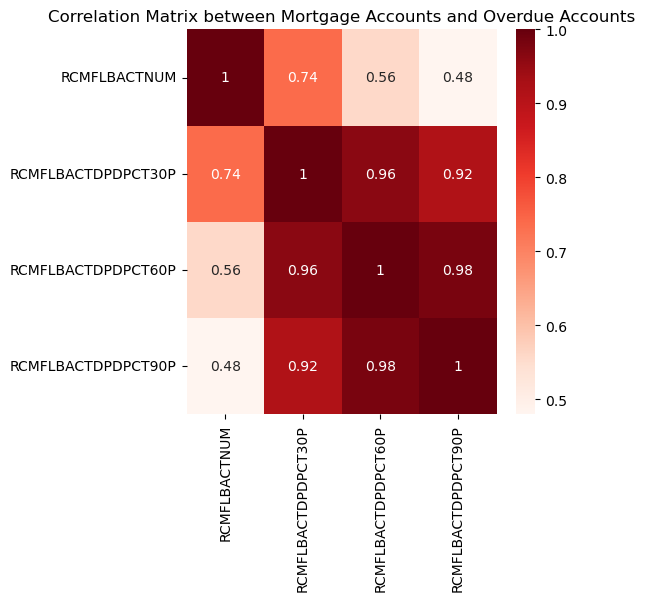

In [11]:
plt.figure(figsize = (5,5))
ax = plt.axes()
sns.heatmap(df_mortgage_acct.corr(), cmap="Reds", annot=True, ax = ax)
ax.set_title('Correlation Matrix between Mortgage Accounts and Overdue Accounts')
plt.show()

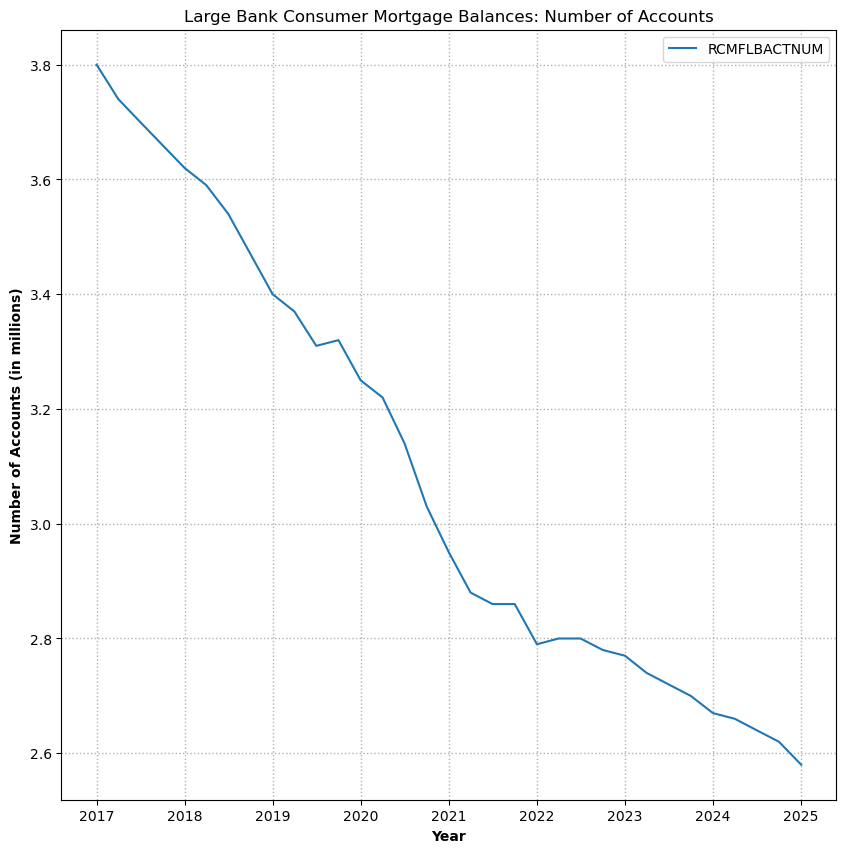

In [12]:
plt.figure(figsize = (10,10))
plt.plot(df_mortgage_acct.index, df_mortgage_acct.iloc[:,0].values, 
             label=df_mortgage_acct.iloc[:,0].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Number of Accounts (in millions)", fontweight = 'bold')
plt.title("Large Bank Consumer Mortgage Balances: Number of Accounts")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()

In [13]:
df_mortgage_acct_overdue = df_mortgage_acct.iloc[:,1:]
df_mortgage_acct_overdue

,RCMFLBACTDPDPCT30P,RCMFLBACTDPDPCT60P,RCMFLBACTDPDPCT90P
DATE,,,
2017-01-01,5.20,3.31,2.65
2017-04-01,5.04,3.16,2.50
2017-07-01,5.22,2.99,2.30
2017-10-01,5.18,3.12,2.39
2018-01-01,4.71,2.76,2.15
2018-04-01,4.40,2.46,1.88
2018-07-01,4.25,2.34,1.74
2018-10-01,3.97,2.24,1.67
2019-01-01,3.64,2.05,1.54


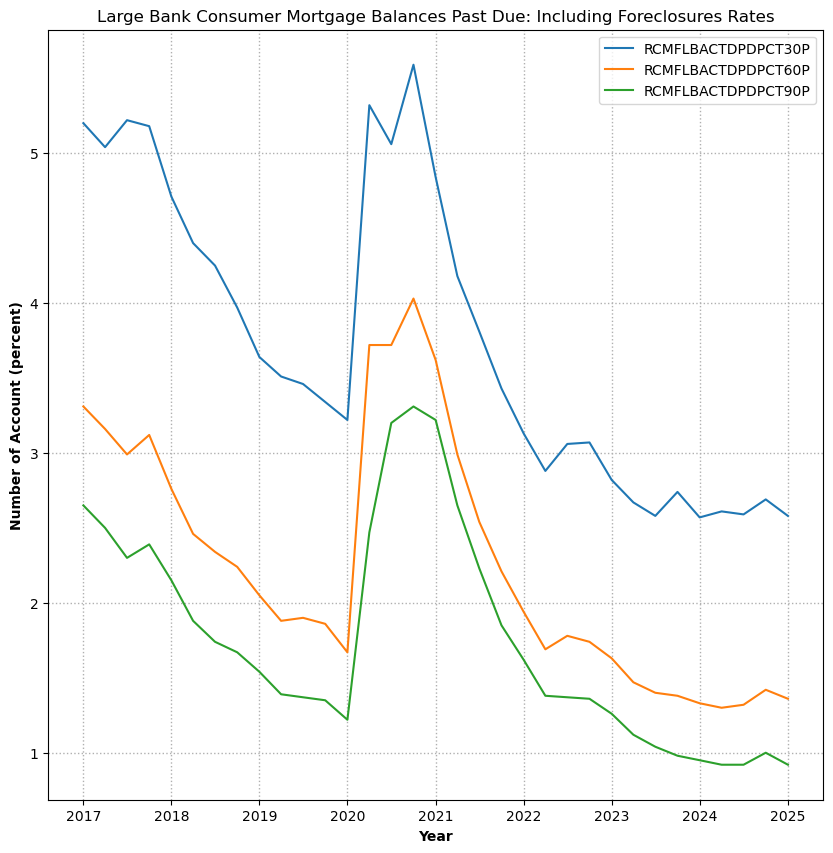

In [14]:
plt.figure(figsize = (10,10))
for i in range(len(df_mortgage_acct_overdue.columns)):
    plt.plot(df_mortgage_acct_overdue.index, df_mortgage_acct_overdue.iloc[:,i].values, 
             label=df_mortgage_acct_overdue.iloc[:,i].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Number of Account (percent)", fontweight = 'bold')
plt.title("Large Bank Consumer Mortgage Balances Past Due: Including Foreclosures Rates")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


The 30, 60 and 90-Day overdue accounts relative to total number of mortgage accounts have beeen decreasing from the 2020 levels.   There were slight increases in the 2nd half of 2024 but 2025 has been trending down.

As for total number of mortgage accounts, this count has been decreasing over the years.
